For more information for each command, please refer to notebook in Estrus dataset

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import glob
import bbknn

In [2]:
sc.settings.verbosity = 3  
sc.logging.print_header() 
sc.settings.set_figure_params(dpi=80) 

scanpy==1.6.0 anndata==0.7.5 umap==0.4.6 numpy==1.19.4 scipy==1.5.3 pandas==1.1.4 scikit-learn==0.23.2 statsmodels==0.12.1 python-igraph==0.8.3 louvain==0.7.0 leidenalg==0.8.2


In [3]:
VE24AmIs = sc.read('./VE24AmIs.h5ad') 

In [4]:
VE24AmIs

AnnData object with n_obs × n_vars = 9794 × 31053
    obs: 'Clusters', 'Region', 'Treatment', '_X', '_Y'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

normalizing counts per cell
    finished (0:00:00)


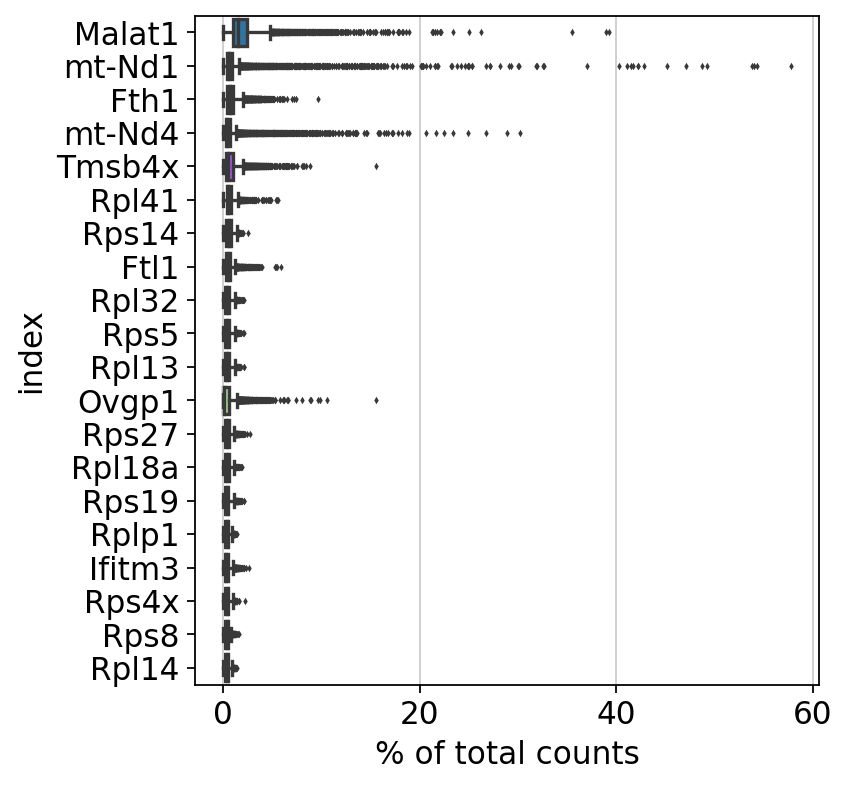

In [5]:
sc.pl.highest_expr_genes(VE24AmIs, n_top=20)

In [6]:
sc.pp.filter_cells(VE24AmIs, min_genes=200) 
sc.pp.filter_genes(VE24AmIs, min_cells=3)

filtered out 121 cells that have less than 200 genes expressed
filtered out 12719 genes that are detected in less than 3 cells


In [7]:
mito_genes = VE24AmIs.var_names.str.startswith('mt') 
VE24AmIs.obs['percent_mito'] = np.sum(
    VE24AmIs[:, mito_genes].X, axis=1).A1 / np.sum(VE24AmIs.X, axis=1).A1 
VE24AmIs.obs['n_counts'] = VE24AmIs.X.sum(axis=1).A1 

/opt/conda/envs/hub_v2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/envs/hub_v2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


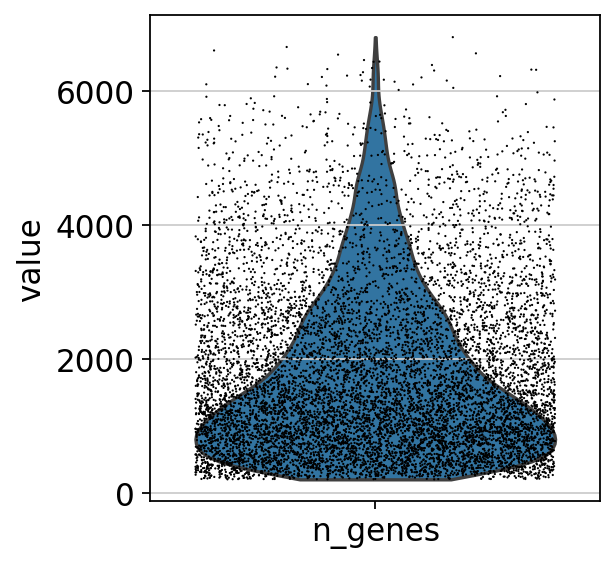

In [8]:
sc.pl.violin(VE24AmIs, ['n_genes'], jitter=0.4)

/opt/conda/envs/hub_v2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/envs/hub_v2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


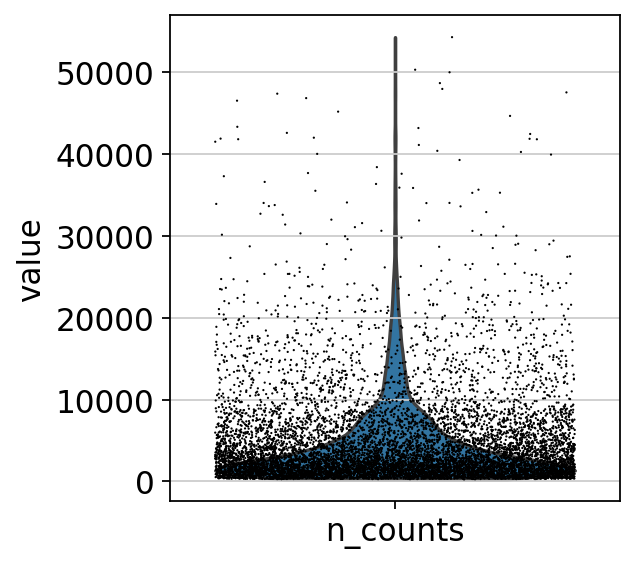

In [9]:
sc.pl.violin(VE24AmIs, ['n_counts'], jitter=0.4)

/opt/conda/envs/hub_v2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/envs/hub_v2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


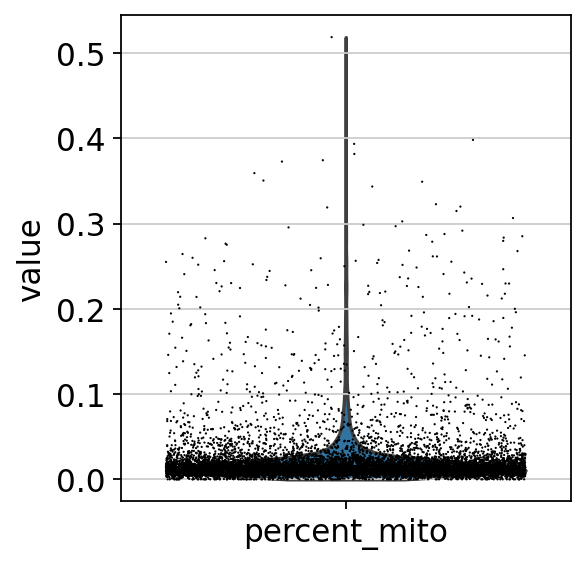

In [10]:
sc.pl.violin(VE24AmIs, ['percent_mito'], 
             
             jitter=0.4)

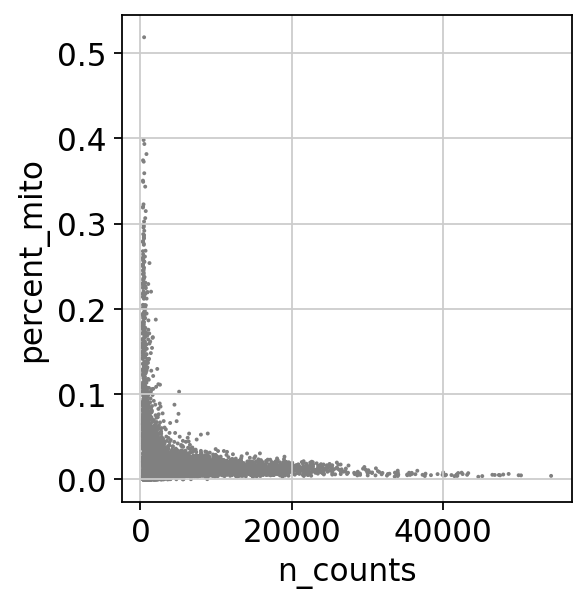

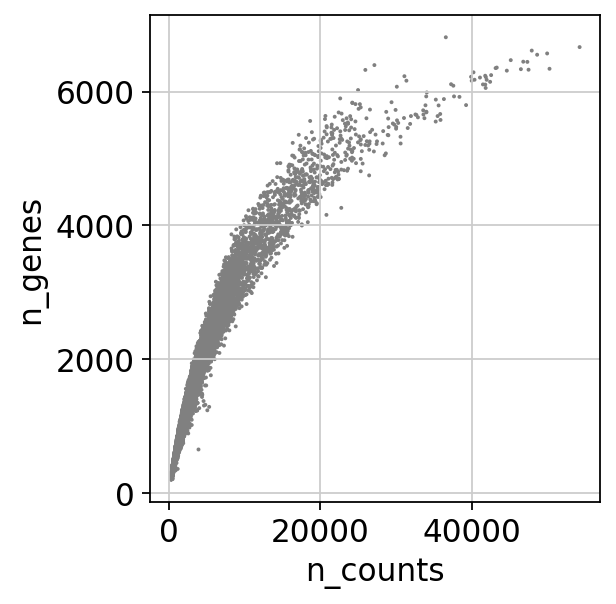

In [11]:
sc.pl.scatter(VE24AmIs, x='n_counts', y='percent_mito')
sc.pl.scatter(VE24AmIs, x='n_counts', y='n_genes')

In [12]:
VE24AmIs = VE24AmIs[VE24AmIs.obs.n_genes < 6000, :]
VE24AmIs = VE24AmIs[VE24AmIs.obs.percent_mito < 0.05, :]

In [13]:
sc.pp.normalize_total(VE24AmIs, target_sum = None)

normalizing counts per cell
    finished (0:00:00)


/opt/conda/envs/hub_v2/lib/python3.7/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [14]:
sc.pp.log1p(VE24AmIs)

In [15]:
sc.pp.regress_out(VE24AmIs, ['n_counts', 'percent_mito']) 

regressing out ['n_counts', 'percent_mito']
    sparse input is densified and may lead to high memory use
    finished (0:01:58)


In [16]:
sc.pp.highly_variable_genes(VE24AmIs, n_top_genes=5000)

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


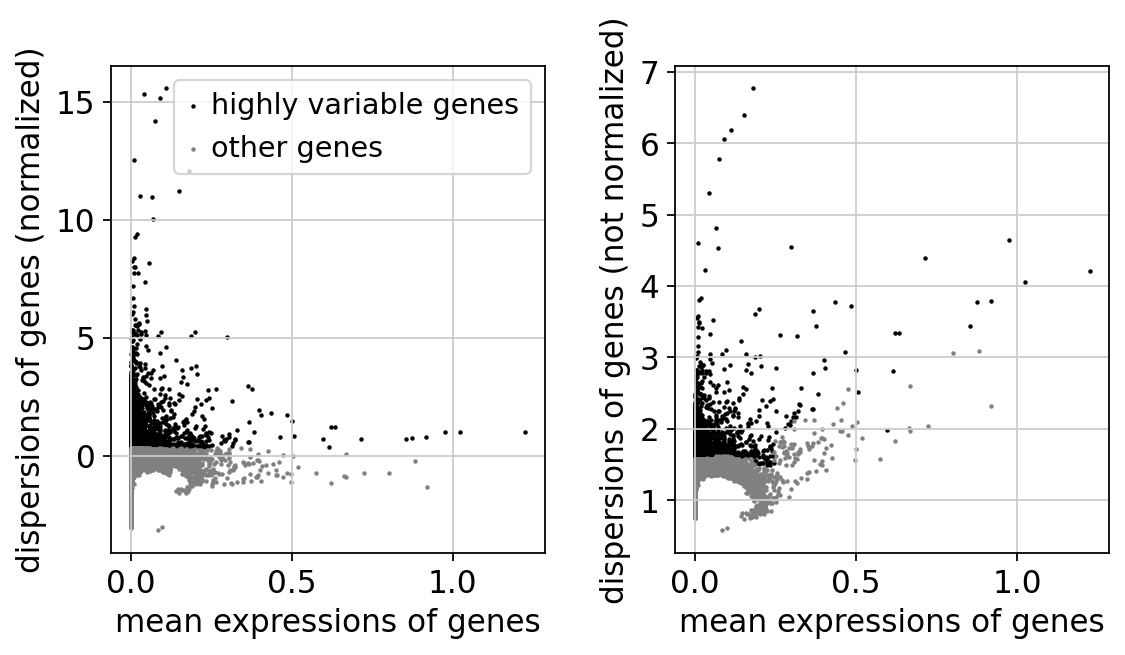

In [17]:
sc.pl.highly_variable_genes(VE24AmIs)

In [18]:
sc.pp.scale(VE24AmIs, max_value=10) 

In [19]:
sc.tl.pca(VE24AmIs, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:03)


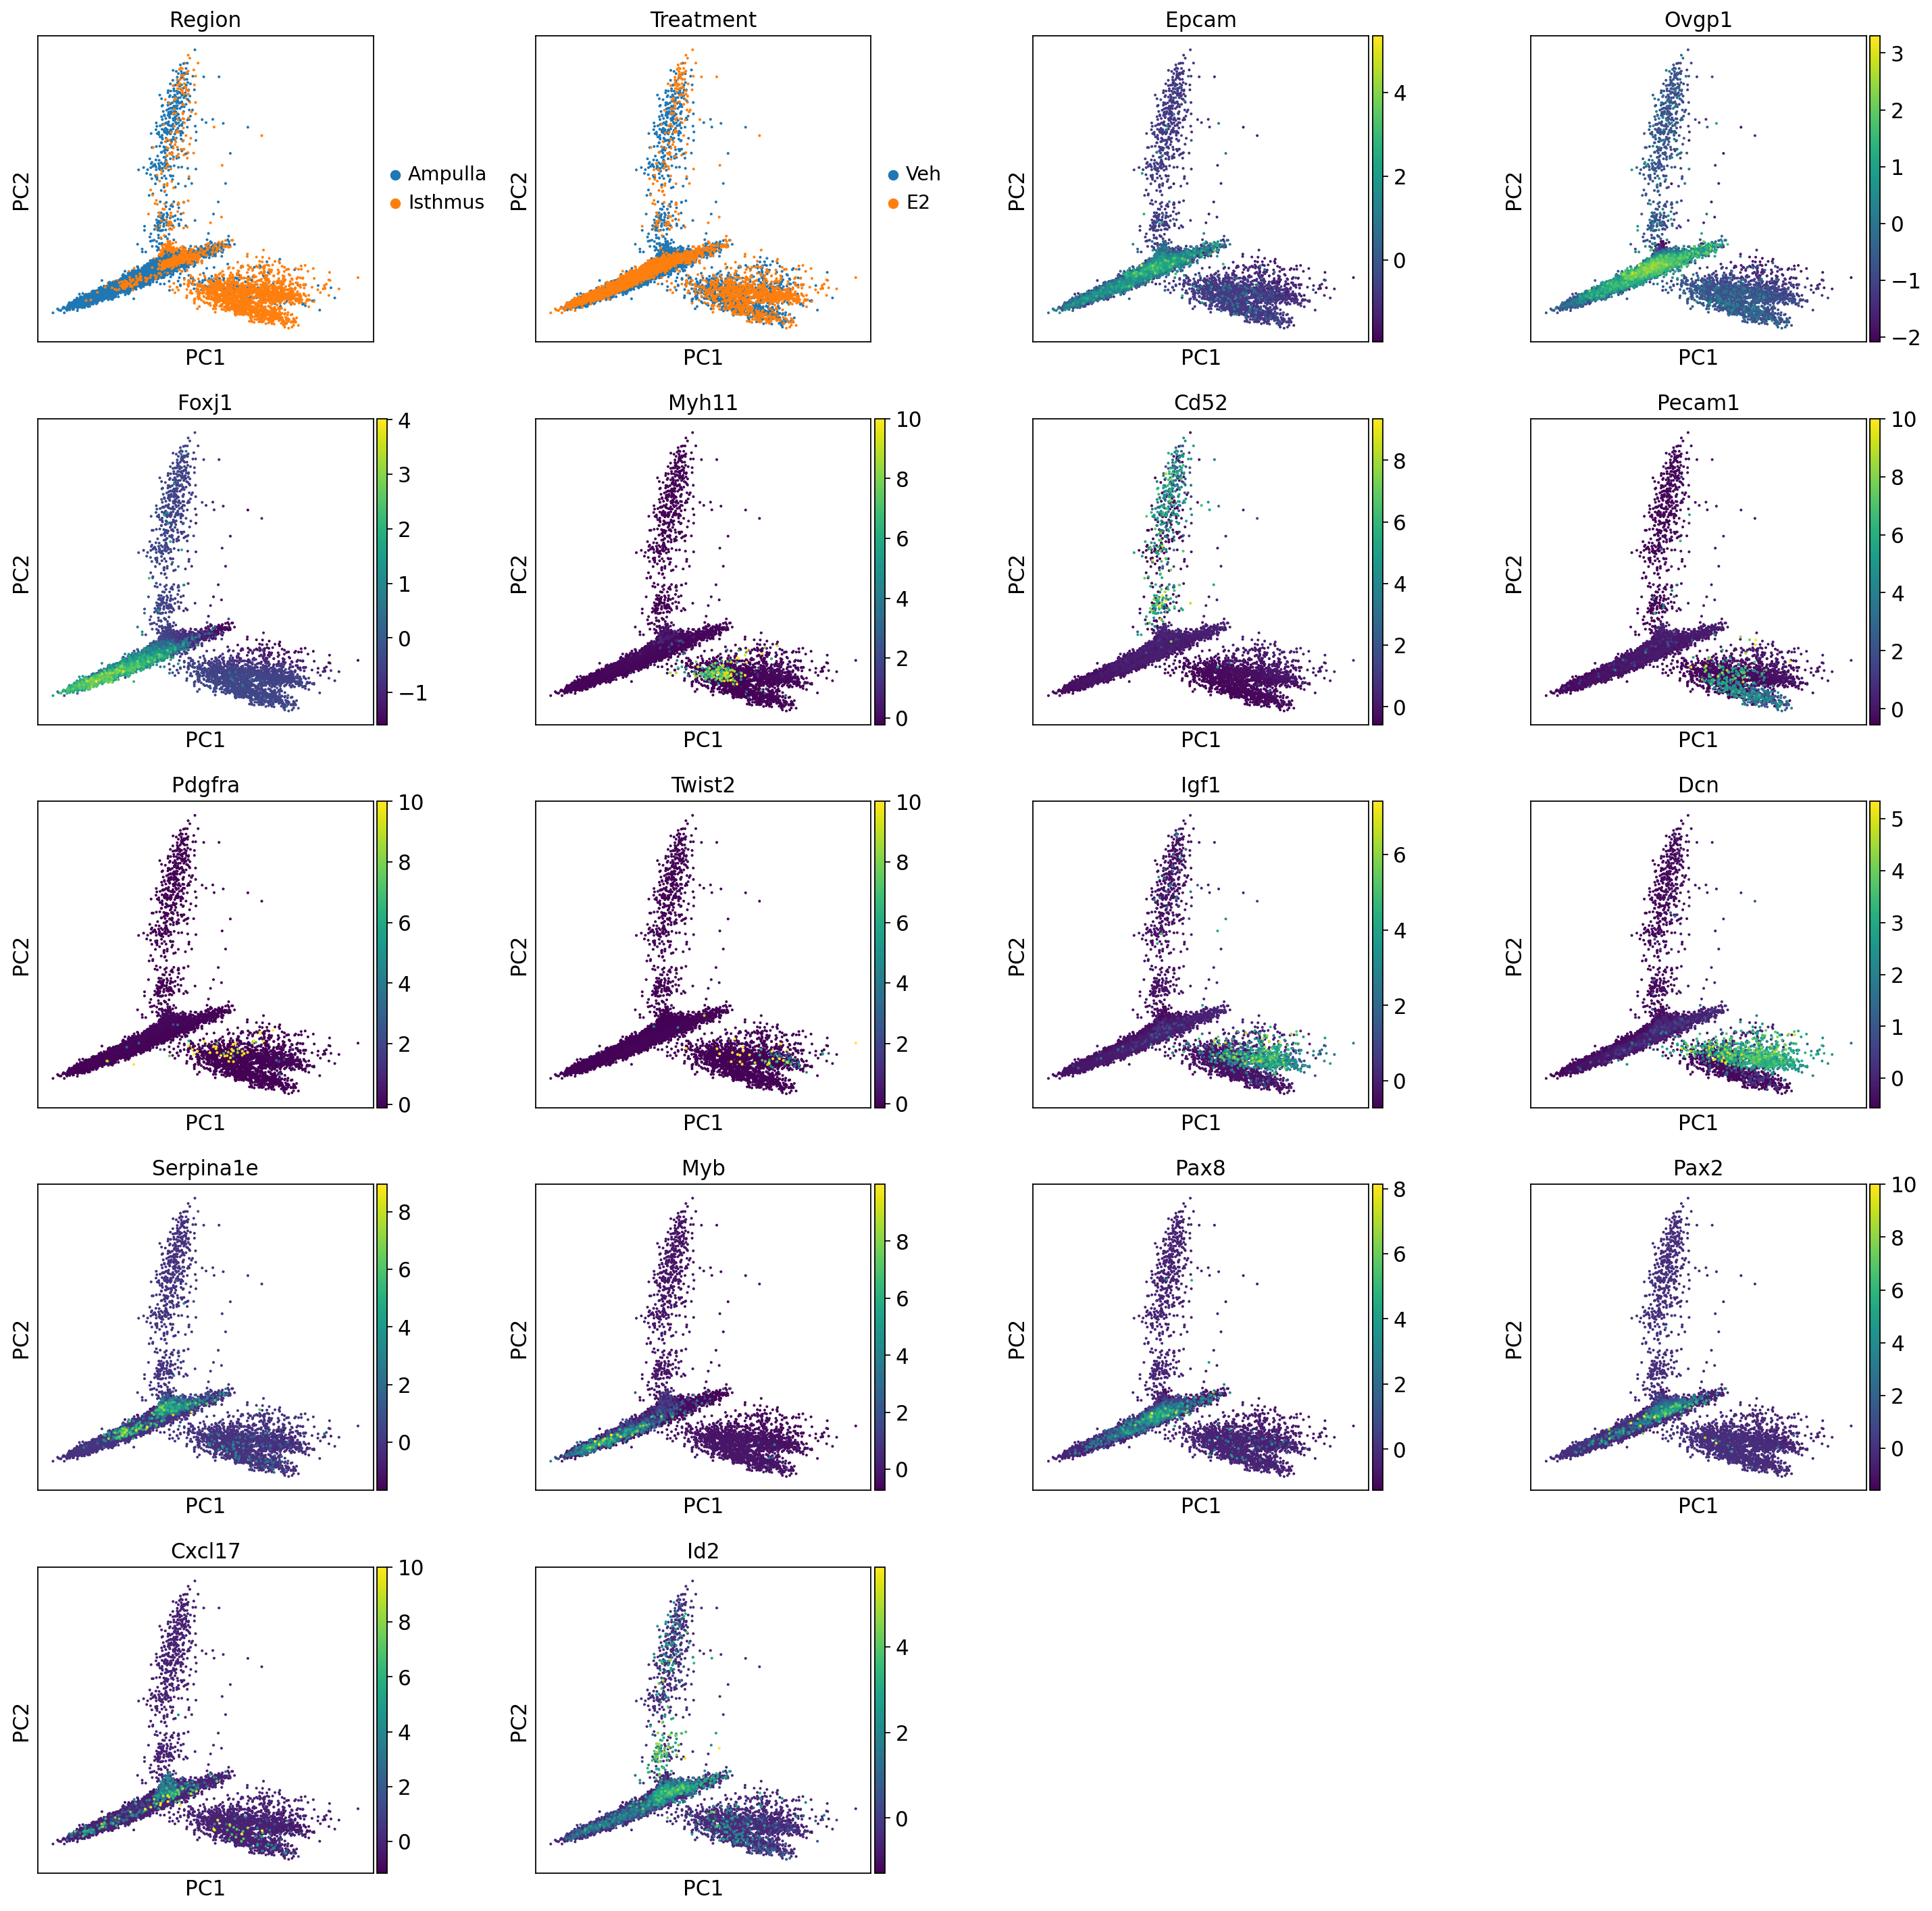

In [20]:
sc.pl.pca(VE24AmIs, wspace=0.35,
          color=['Region', 'Treatment', 'Epcam', 'Ovgp1', 'Foxj1', 'Myh11', 'Cd52', 'Pecam1',
                  
                  'Pdgfra', 'Twist2', 'Igf1', 'Dcn', 'Serpina1e', 'Myb', 'Pax8', 'Pax2', 'Cxcl17', 'Id2'])

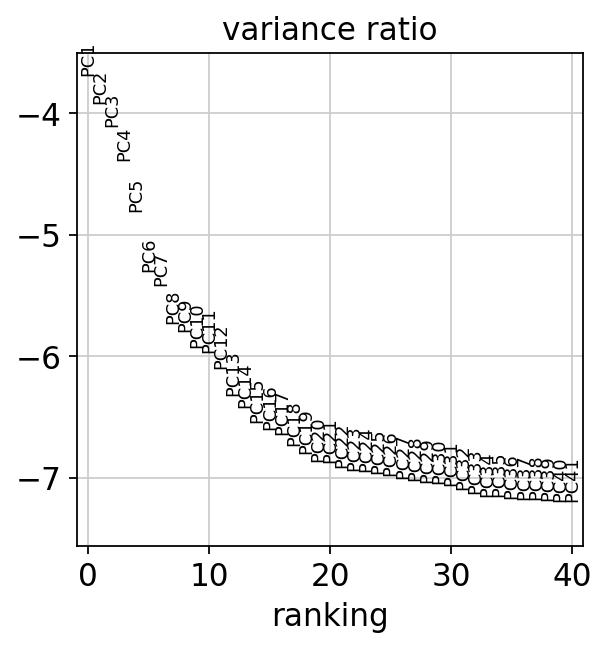

In [21]:
sc.pl.pca_variance_ratio(VE24AmIs, n_pcs=40, log=True)

In [22]:
VE24AmIs

AnnData object with n_obs × n_vars = 8990 × 18334
    obs: 'Clusters', 'Region', 'Treatment', '_X', '_Y', 'n_genes', 'percent_mito', 'n_counts'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'Region_colors', 'Treatment_colors'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [23]:
sc.pp.neighbors(VE24AmIs, n_neighbors=10, n_pcs=37)

computing neighbors
    using 'X_pca' with n_pcs = 37
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:05)


In [24]:
sc.tl.umap(VE24AmIs)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)


Plot UMAPs. When you look at the data (both times and regions), you'll see that the analysis hasn't computed for batch-effect yet. Because all the times and regions are still really seperated. That's because we haven't run 'bbknn' to correct for batch-effect yet.

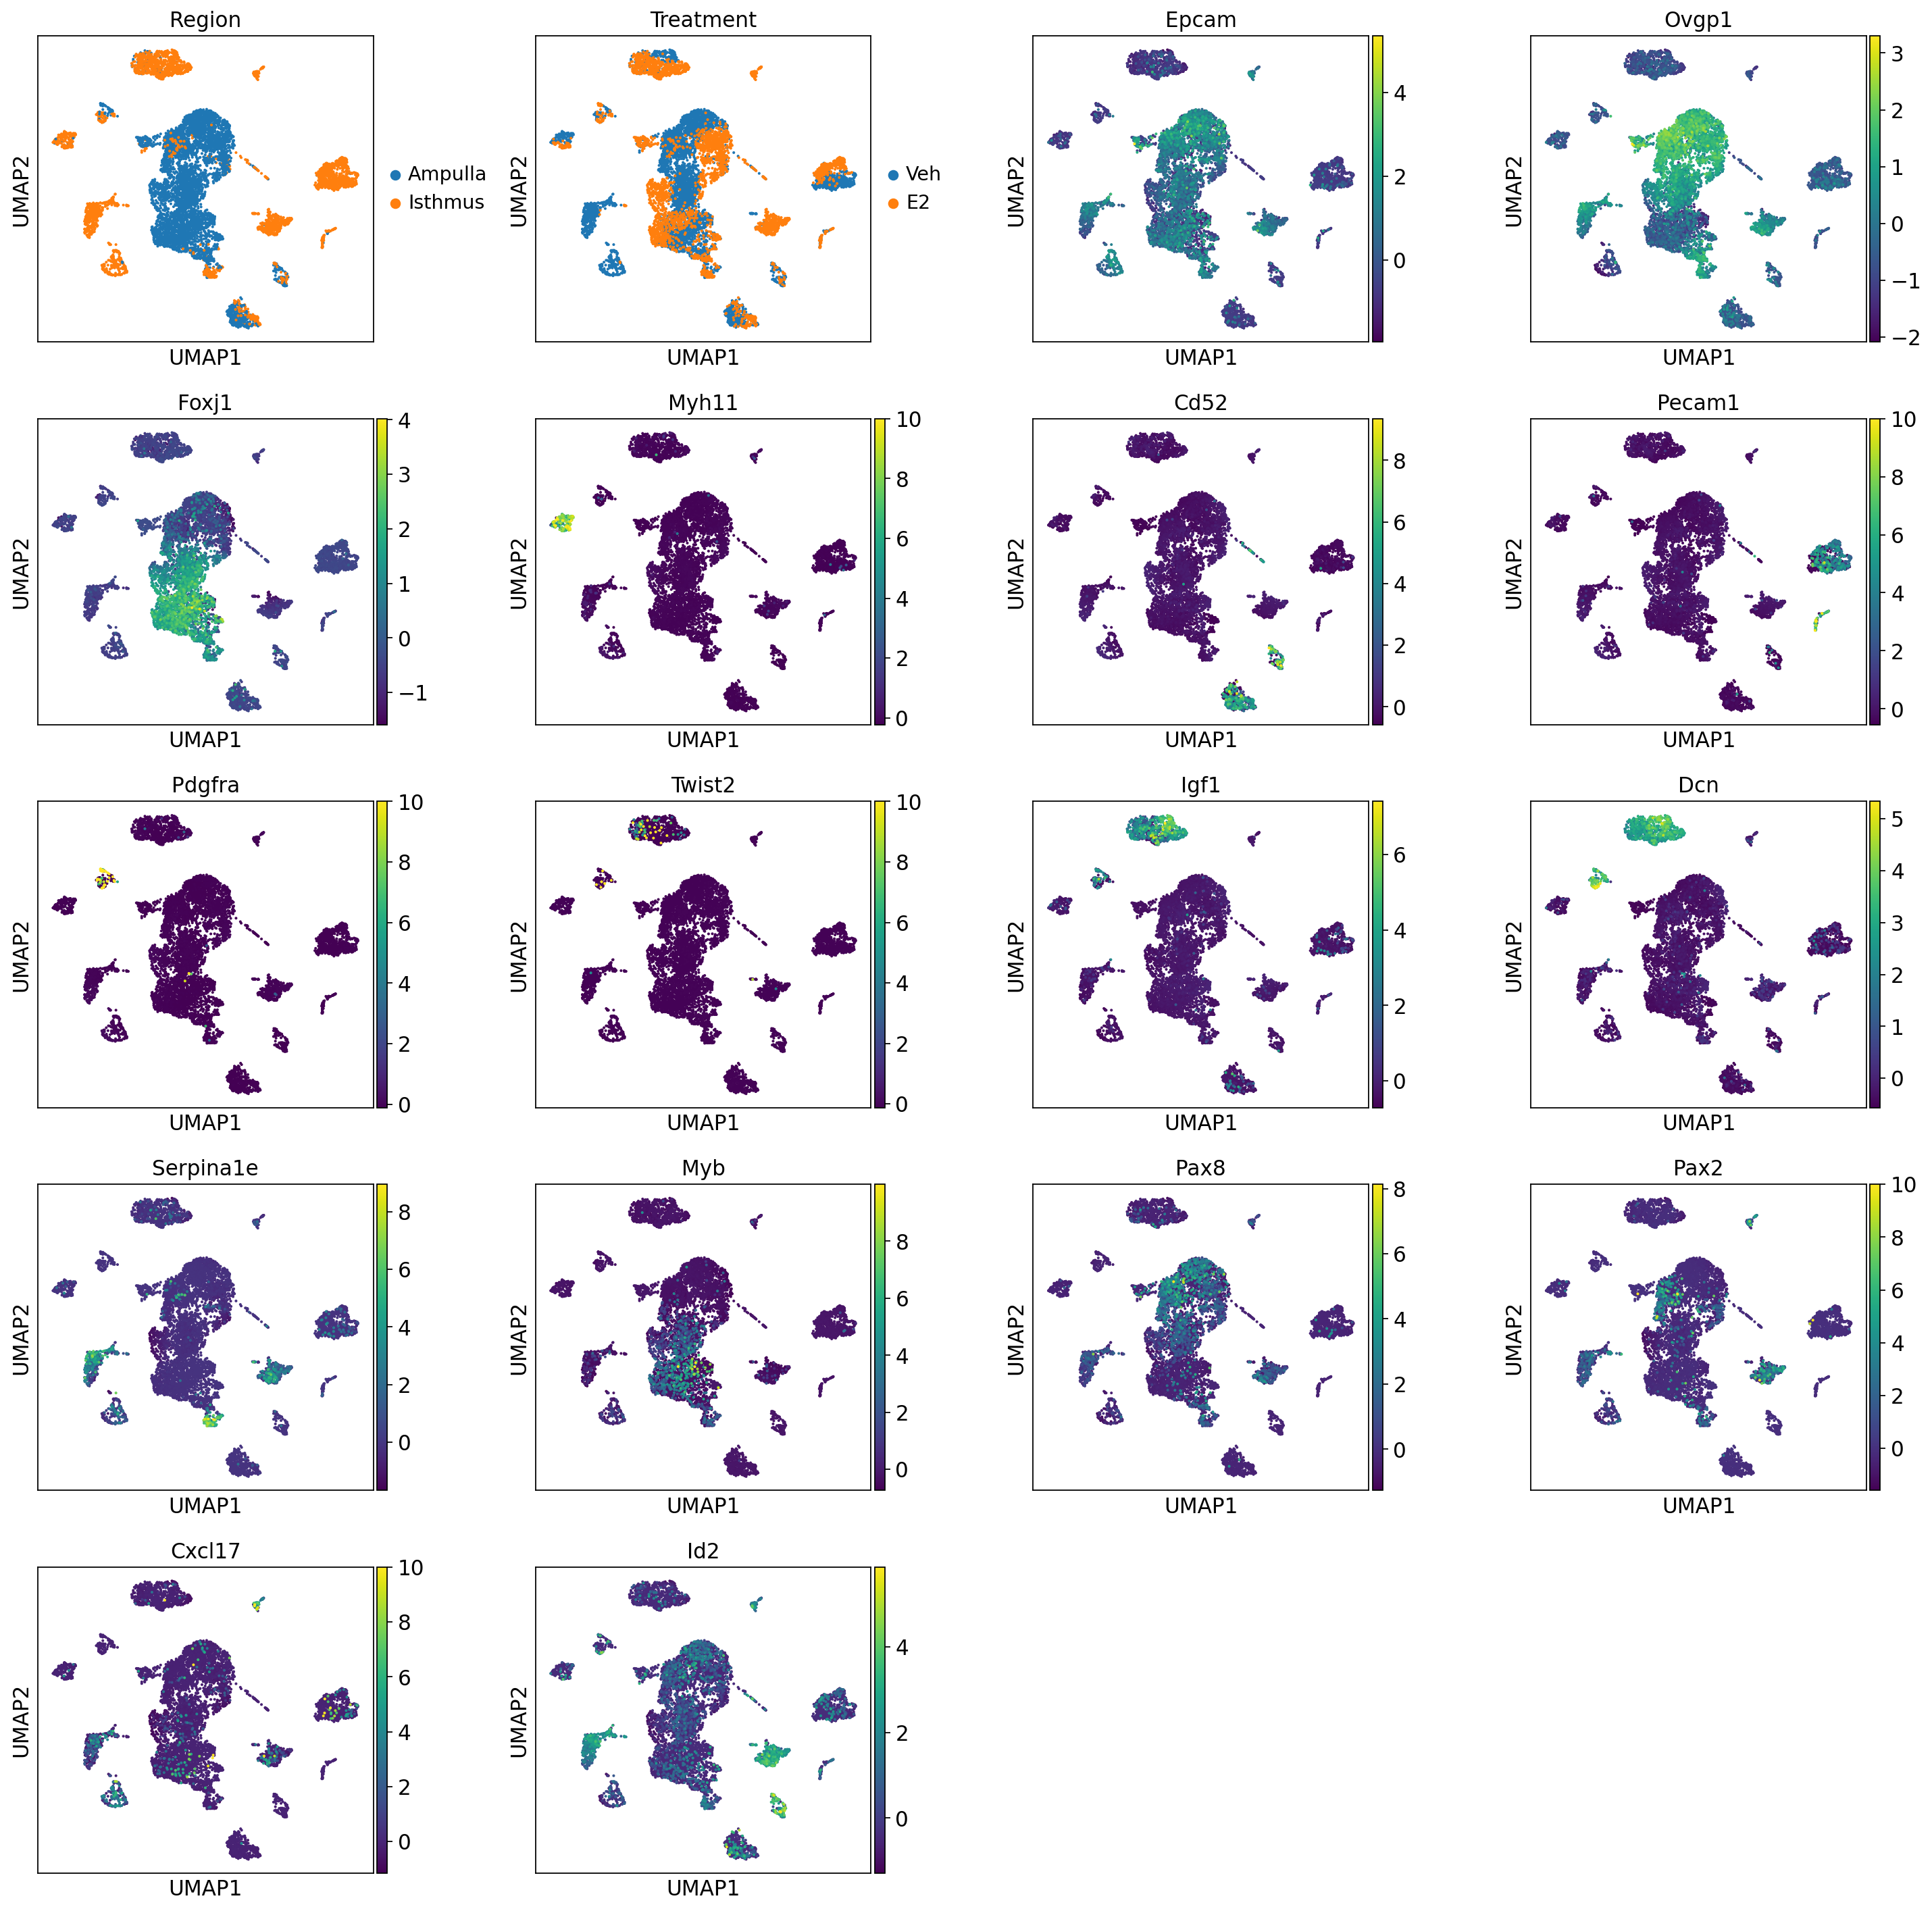

In [25]:
sc.pl.umap(VE24AmIs, wspace=0.35,
           color=['Region', 'Treatment', 'Epcam', 'Ovgp1', 'Foxj1', 'Myh11', 'Cd52', 'Pecam1',
                  
                  'Pdgfra', 'Twist2', 'Igf1', 'Dcn', 'Serpina1e', 'Myb', 'Pax8', 'Pax2', 'Cxcl17', 'Id2'])

In [26]:
sc.tl.leiden(VE24AmIs, resolution=0.08) 

running Leiden clustering
    finished: found 11 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


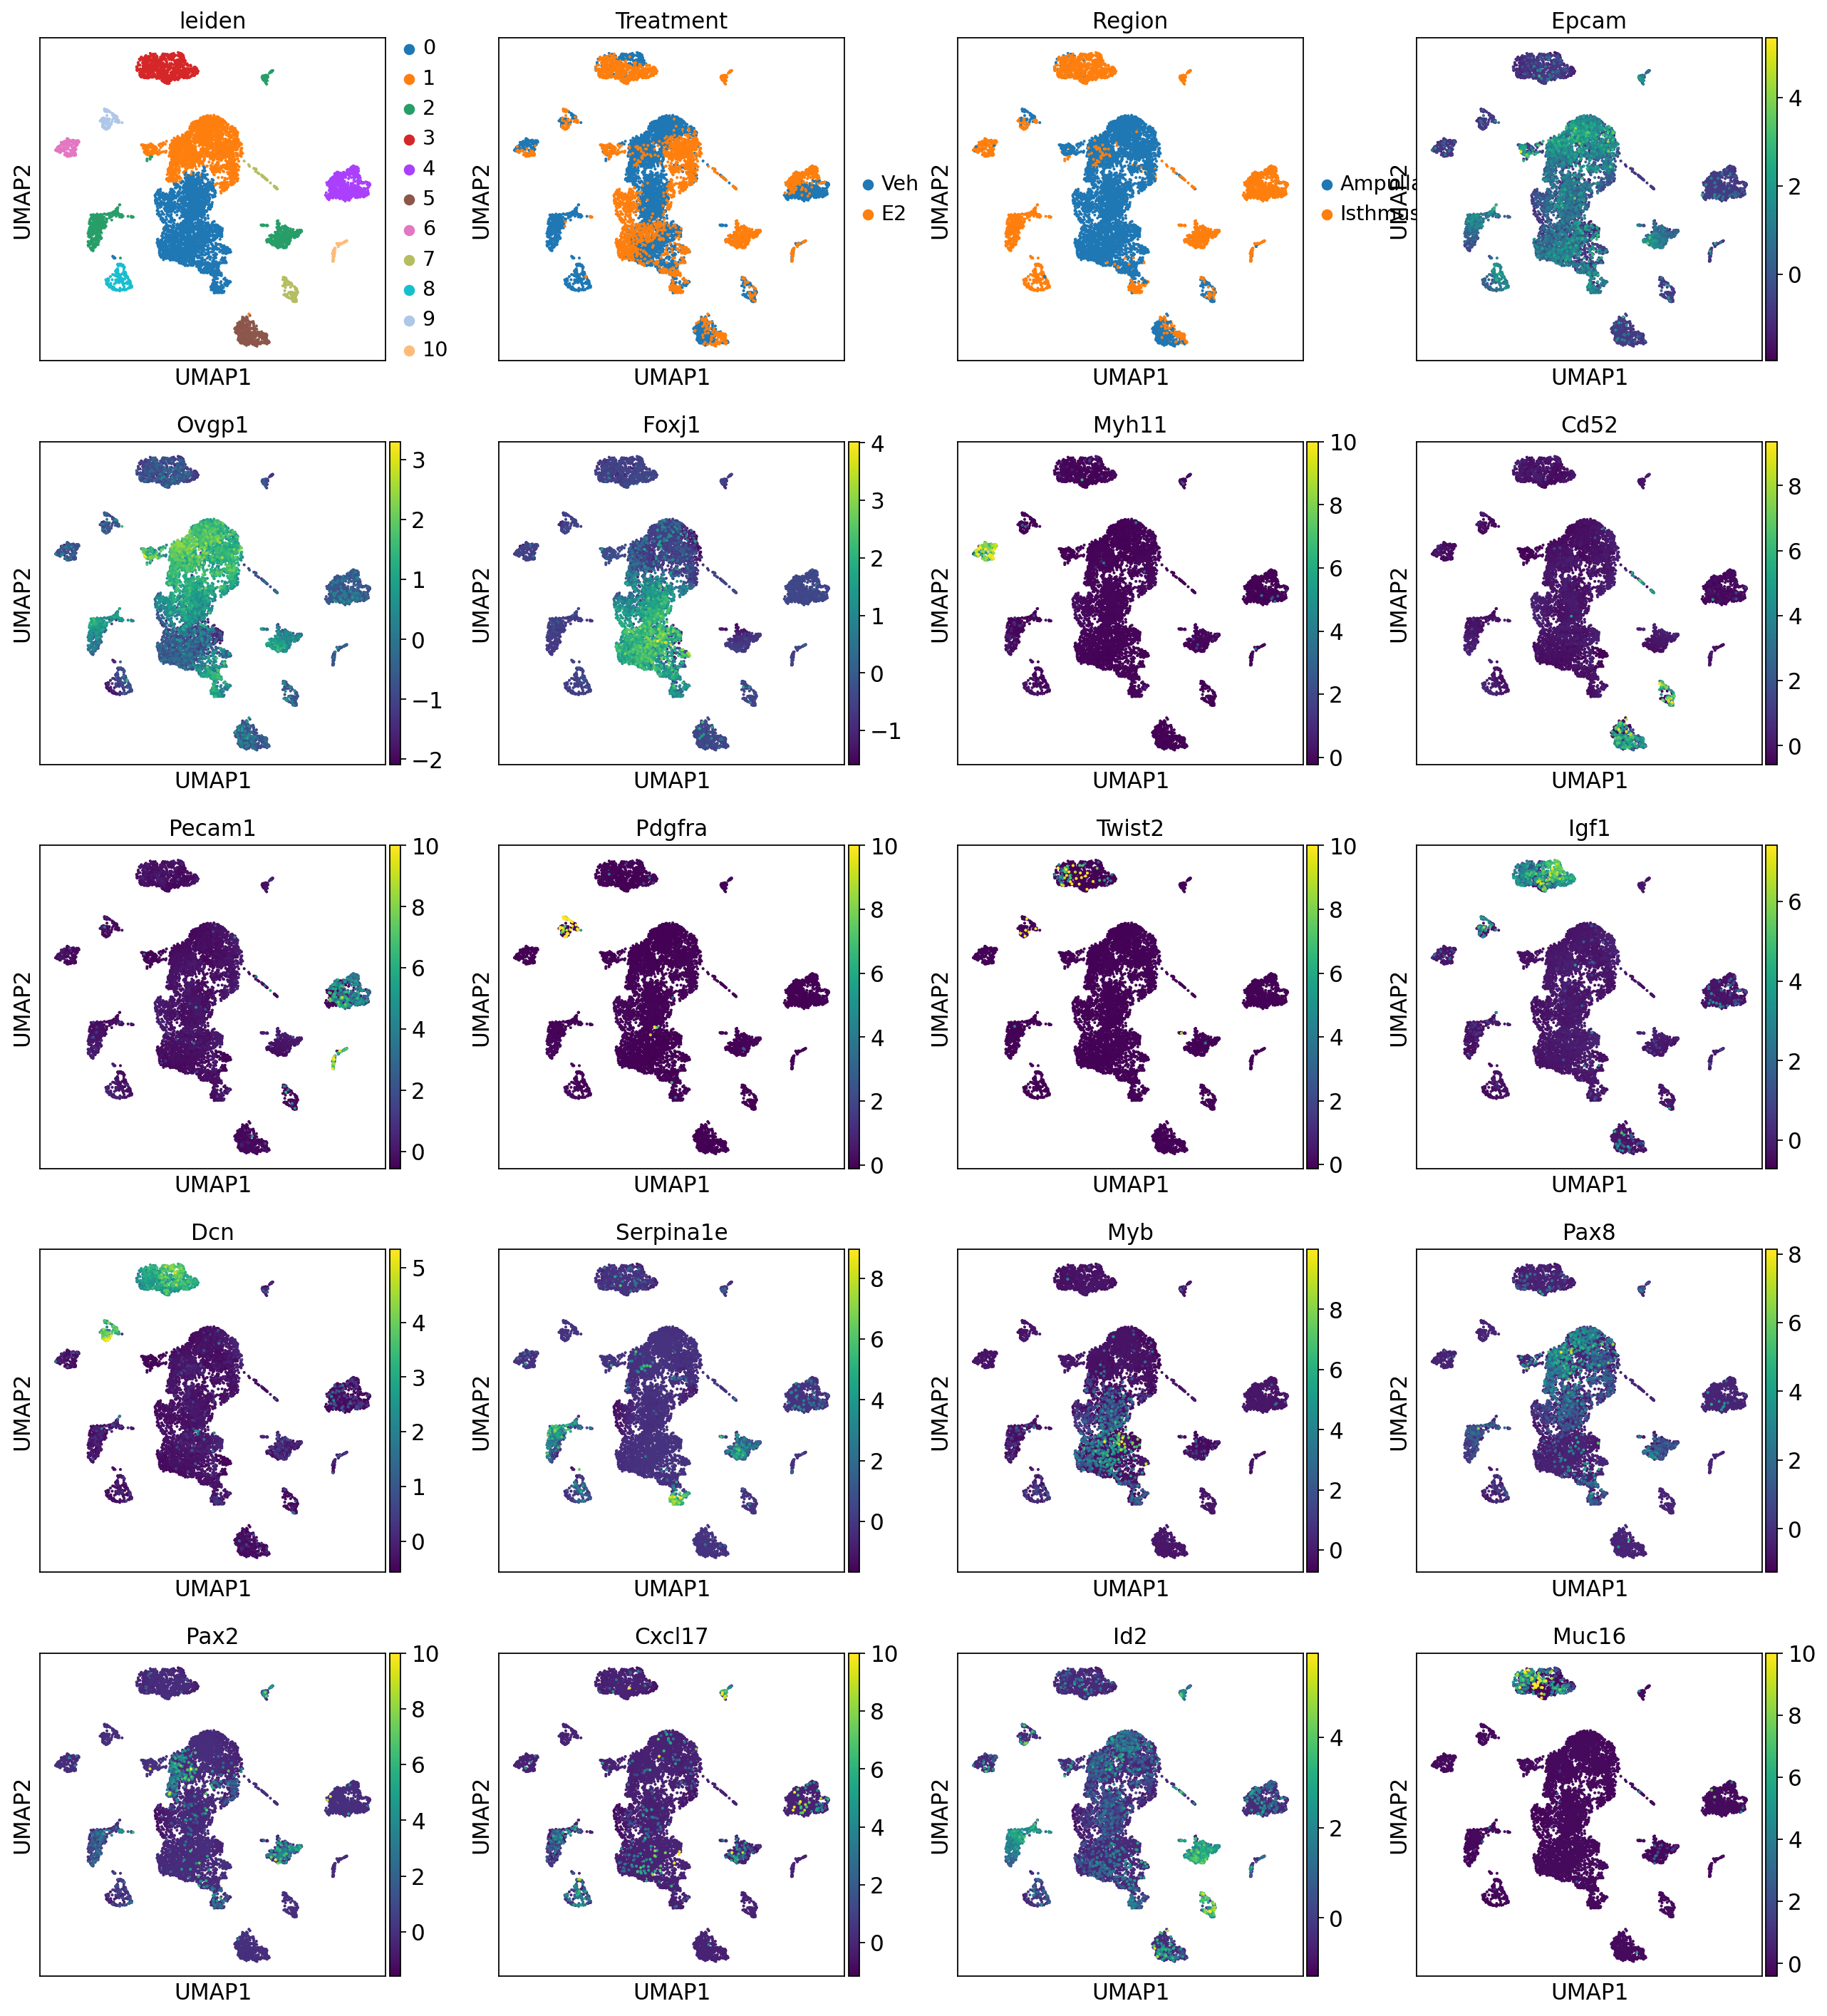

In [27]:
sc.pl.umap(VE24AmIs,
           color=['leiden', 'Treatment', 'Region', 'Epcam', 'Ovgp1', 'Foxj1', 'Myh11', 'Cd52', 'Pecam1',
                  
                  'Pdgfra', 'Twist2', 'Igf1', 'Dcn', 'Serpina1e', 'Myb', 'Pax8', 'Pax2', 'Cxcl17', 'Id2', 'Muc16'])

In [28]:
VE24AmIs_subset = VE24AmIs[VE24AmIs.obs['leiden'].isin(
    ['0', '1', '2', '3', '6', '8', '9'])]

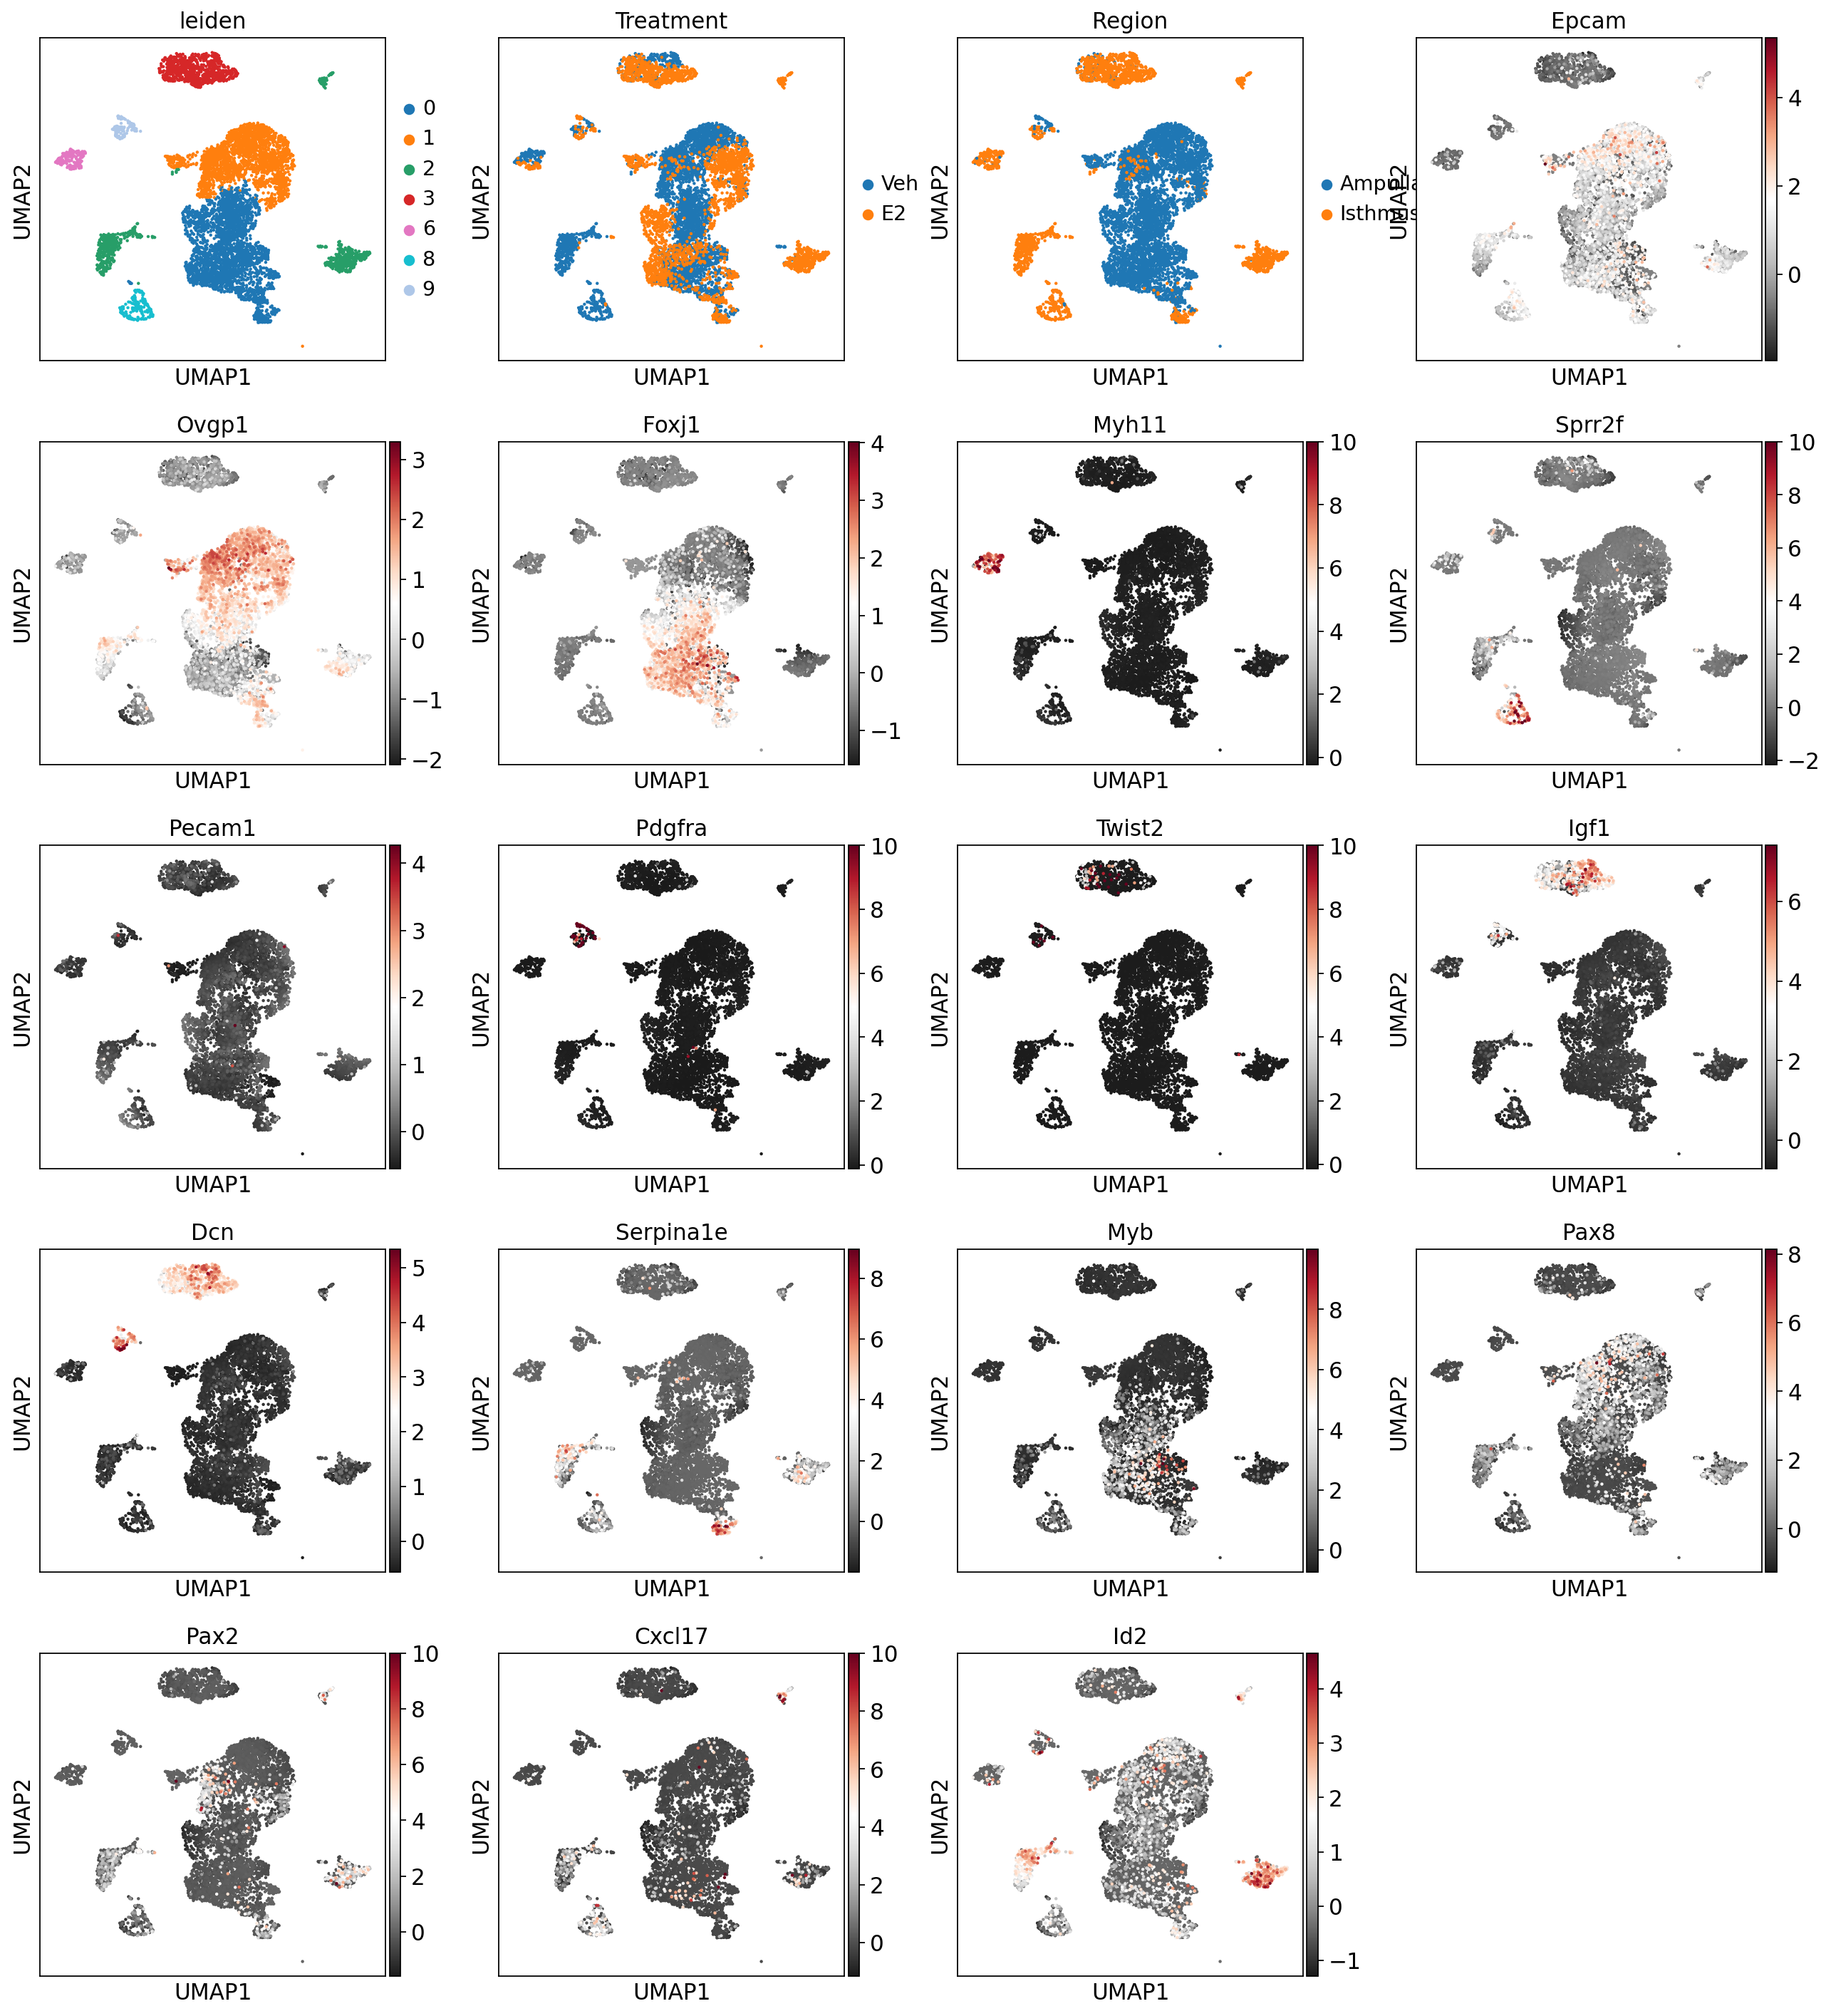

In [29]:
sc.pl.umap(VE24AmIs_subset, color_map='RdGy_r',
           color=['leiden', 'Treatment', 'Region', 'Epcam', 'Ovgp1', 'Foxj1', 'Myh11', 'Sprr2f', 'Pecam1',
                  
                  'Pdgfra', 'Twist2', 'Igf1', 'Dcn', 'Serpina1e', 'Myb', 'Pax8', 'Pax2', 'Cxcl17', 'Id2'])

In [30]:
VE24AmIs_subset

View of AnnData object with n_obs × n_vars = 7612 × 18334
    obs: 'Clusters', 'Region', 'Treatment', '_X', '_Y', 'n_genes', 'percent_mito', 'n_counts', 'leiden'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'Region_colors', 'Treatment_colors', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'